Duplex Analysis

In [ ]:
# download Olmo poems
import gdown

url = "https://drive.google.com/file/d/11xtnNRZ_CP4WNIlTIMctTQOCVkj0niAF/view"
output = "Olmo_poems_clean.csv"
gdown.download(url=url, output=output, fuzzy=True)


Downloading...
From: https://drive.google.com/uc?id=11xtnNRZ_CP4WNIlTIMctTQOCVkj0niAF
To: /content/Olmo_poems_clean.csv
100%|██████████| 188k/188k [00:00<00:00, 19.4MB/s]


'Olmo_poems_clean.csv'

In [ ]:
# load in csv
import pandas as pd

duplexes_df = pd.read_csv("Olmo_poems_clean.csv")

duplexes_df

,subject,with_brown_rules,prompt_type,poem_text
0,abuse,True,figurative,"Night hums low, a bruised refrain, \nShadows t..."
1,abuse,True,specific,"A rusty key beneath the splintered floor, \nLo..."
2,activities,True,general,"\nActivities bloom in morning’s pale light, \n..."
3,activities,True,figurative,"\nNight’s rhythm hums, a restless tune, \nStep..."
4,activities,True,specific,"\nBent paperclip—my morning’s first hold, \nTw..."
...,...,...,...,...
239,weather,False,figurative,The storm arrives when I least expect change.\...
240,weather,False,specific,\n\nThe radio crackles with tomorrow's storm.\...
241,youth,False,general,\n\nWe thought our hearts could hold the whole...
242,youth,False,figurative,"At seventeen, I thought I held forever\nAt sev..."


In [ ]:
# print a random Olmo duplex
import random

print(duplexes_df["poem_text"].iloc[random.randint(0, len(duplexes_df) - 1)])



We built our love on sand that wouldn't hold
We built our love on sand that wouldn't hold
The castle crumbled when the truth was told
The castle crumbled when the truth was told
Your whispered lies became my heaviest gold
Your whispered lies became my heaviest gold
I wore them daily till my heart grew cold
I wore them daily till my heart grew cold
Now empty rooms echo what can't be sold
Now empty rooms echo what can't be sold
The silence speaks of stories left untold
The silence speaks of stories left untold
But in this wreckage, something new takes hold
But in this wreckage, something new takes hold
We built our love on sand that wouldn't hold


Calculating Average Number of Lines

In [ ]:
# as a baseline, count Brown's actual duplexes
# download them first

url = "https://drive.google.com/file/d/1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz/view?usp=drive_link"
output = "brown_poems.csv"
gdown.download(url=url, output=output, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1SqTw3A99hPDbTUxZ-OoJD4wGdl0ZF3Oz
To: /content/brown_poems.csv
100%|██████████| 3.18k/3.18k [00:00<00:00, 9.62MB/s]


'brown_poems.csv'

In [ ]:
# read them in
brown_poems_df = pd.read_csv("brown_poems.csv")

brown_poems_df


,author,poem_title,poem_text,form
0,Jericho Brown,Duplex (p. 18),A poem is a gesture toward home.\nIt makes dar...,duplex
1,Jericho Brown,Duplex (p. 27),The opposite of rape is understanding\nA field...,duplex
2,Jericho Brown,Duplex (p. 49),"I begin with love, hoping to end there.\nI don...",duplex
3,Jericho Brown,Duplex (p. 68),Don't accuse me of sleeping with your man\nWhe...,duplex
4,Jericho Brown,Duplex: Cento (p. 72),"My last love drove a burgundy car,\nColor of a...",duplex


In [ ]:
brown_poems_df["poem_length"] = brown_poems_df["poem_text"].apply(lambda poem: len([line for line in poem.split("\n") if line.strip() != ""]))

brown_poems_df["poem_length"].describe()

,poem_length
count,5.0
mean,14.0
std,0.0
min,14.0
25%,14.0
50%,14.0
75%,14.0
max,14.0


In [ ]:
# do the same for the other duplexes

duplexes_df["poem_length"] = duplexes_df["poem_text"].apply(lambda poem: len([line for line in poem.split("\n") if line.strip() != ""]))

duplexes_df["poem_length"].describe()

,poem_length
count,244.000000
mean,17.245902
std,4.336298
min,10.000000
25%,15.000000
50%,16.000000
75%,18.000000
max,40.000000


Pronoun Analysis

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 113.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
# load the model
import spacy

nlp = spacy.load("en_core_web_sm")

In [ ]:
# clunky pronoun counting function
def count_pronouns(poem_text):
    poem = nlp(poem_text)

    # initialize counters
    counts = {
        "pronoun_count": 0,
        "plural_1_count": 0,
        "plural_2_count": 0,
        "plural_3_count": 0,
        "sing_1_count": 0,
        "sing_2_count": 0,
        "sing_3_count": 0
    }

    for token in poem:
        if token.pos_ == "PRON":
            counts["pronoun_count"] += 1

            if token.morph.get("Number") == ["Plur"]:
                if token.morph.get("Person") == ["1"]:
                    counts["plural_1_count"] += 1
                elif token.morph.get("Person") == ["2"]:
                    counts["plural_2_count"] += 1
                elif token.morph.get("Person") == ["3"]:
                    counts["plural_3_count"] += 1
            else:
                if token.morph.get("Person") == ["1"]:
                    counts["sing_1_count"] += 1
                elif token.morph.get("Person") == ["2"]:
                    counts["sing_2_count"] += 1
                elif token.morph.get("Person") == ["3"]:
                    counts["sing_3_count"] += 1

    return pd.Series(counts)

In [ ]:
# count the pronouns in Brown's poems
brown_poems_df[["pronoun_count", "plural_1_count", "plural_2_count",
                "plural_3_count", "sing_1_count", "sing_2_count",
                "sing_3_count"]] = brown_poems_df["poem_text"].apply(count_pronouns)

brown_poems_df

,author,poem_title,poem_text,form,poem_length,pronoun_count,plural_1_count,plural_2_count,plural_3_count,sing_1_count,sing_2_count,sing_3_count
0,Jericho Brown,Duplex (p. 18),A poem is a gesture toward home.\nIt makes dar...,duplex,14,14,1,0,0,8,0,5
1,Jericho Brown,Duplex (p. 27),The opposite of rape is understanding\nA field...,duplex,14,6,0,0,0,6,0,0
2,Jericho Brown,Duplex (p. 49),"I begin with love, hoping to end there.\nI don...",duplex,14,25,1,0,0,13,1,0
3,Jericho Brown,Duplex (p. 68),Don't accuse me of sleeping with your man\nWhe...,duplex,14,18,2,0,0,7,4,4
4,Jericho Brown,Duplex: Cento (p. 72),"My last love drove a burgundy car,\nColor of a...",duplex,14,12,3,0,2,5,0,2


In [ ]:
# count the pronouns in the Olmo poems
duplexes_df[["pronoun_count", "plural_1_count", "plural_2_count",
                "plural_3_count", "sing_1_count", "sing_2_count",
                "sing_3_count"]] = duplexes_df["poem_text"].apply(count_pronouns)

duplexes_df

,subject,with_brown_rules,prompt_type,poem_text,poem_length,pronoun_count,plural_1_count,plural_2_count,plural_3_count,sing_1_count,sing_2_count,sing_3_count
0,abuse,True,figurative,"Night hums low, a bruised refrain, \nShadows t...",28,7,0,0,1,3,1,1
1,abuse,True,specific,"A rusty key beneath the splintered floor, \nLo...",20,17,0,0,0,9,2,4
2,activities,True,general,"\nActivities bloom in morning’s pale light, \n...",32,25,1,0,2,19,0,0
3,activities,True,figurative,"\nNight’s rhythm hums, a restless tune, \nStep...",16,7,3,0,0,3,0,0
4,activities,True,specific,"\nBent paperclip—my morning’s first hold, \nTw...",12,11,0,0,0,6,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
239,weather,False,figurative,The storm arrives when I least expect change.\...,15,13,0,0,0,9,0,0
240,weather,False,specific,\n\nThe radio crackles with tomorrow's storm.\...,15,16,4,0,0,6,4,0
241,youth,False,general,\n\nWe thought our hearts could hold the whole...,15,34,18,0,4,0,4,2
242,youth,False,figurative,"At seventeen, I thought I held forever\nAt sev...",15,23,2,0,0,16,0,0


In [ ]:
# get value count of duplexes_df["pronoun_count"]
duplexes_df["pronoun_count"].describe()

,pronoun_count
count,244.000000
mean,14.122951
std,7.901219
min,0.000000
25%,7.750000
50%,14.000000
75%,20.000000
max,34.000000


In [ ]:
brown_poems_df["pronoun_count"].describe()

,pronoun_count
count,5.000000
mean,15.000000
std,7.071068
min,6.000000
25%,12.000000
50%,14.000000
75%,18.000000
max,25.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# normalizing function
def normalize_pronoun_counts(df):
    normalized_df = df.copy()

    # calculate proportions for each pronoun type
    normalized_df['plural_1_prop'] = df['plural_1_count'] / df['pronoun_count']
    normalized_df['plural_2_prop'] = df['plural_2_count'] / df['pronoun_count']
    normalized_df['plural_3_prop'] = df['plural_3_count'] / df['pronoun_count']
    normalized_df['sing_1_prop'] = df['sing_1_count'] / df['pronoun_count']
    normalized_df['sing_2_prop'] = df['sing_2_count'] / df['pronoun_count']
    normalized_df['sing_3_prop'] = df['sing_3_count'] / df['pronoun_count']

    # Replace NaN (from division by zero when pronoun_count=0) with 0
    normalized_df = normalized_df.fillna(0)

    return normalized_df

In [ ]:
# normalize both dataframes
brown_normalized = normalize_pronoun_counts(brown_poems_df)
Olmo_normalized = normalize_pronoun_counts(duplexes_df)

# calculate mean proportions for each dataset
pronoun_types = ['plural_1_prop', 'plural_2_prop', 'plural_3_prop',
                 'sing_1_prop', 'sing_2_prop', 'sing_3_prop']

brown_means = brown_normalized[pronoun_types].mean()
Olmo_means = Olmo_normalized[pronoun_types].mean()

# create comparison dataframe
comparison_df = pd.DataFrame({
    'Brown Poems': brown_means,
    'Olmo Duplexes': Olmo_means,
    'Difference': Olmo_means - brown_means
})

print("Average Normalized Pronoun Counts:")
print(comparison_df)
print("\n")


Average Normalized Pronoun Counts:
               Brown Poems  Olmo Duplexes  Difference
plural_1_prop     0.094508       0.157937    0.063429
plural_2_prop     0.000000       0.000000    0.000000
plural_3_prop     0.033333       0.044927    0.011593
sing_1_prop       0.579397       0.373336   -0.206061
sing_2_prop       0.052444       0.055050    0.002605
sing_3_prop       0.149206       0.125690   -0.023516




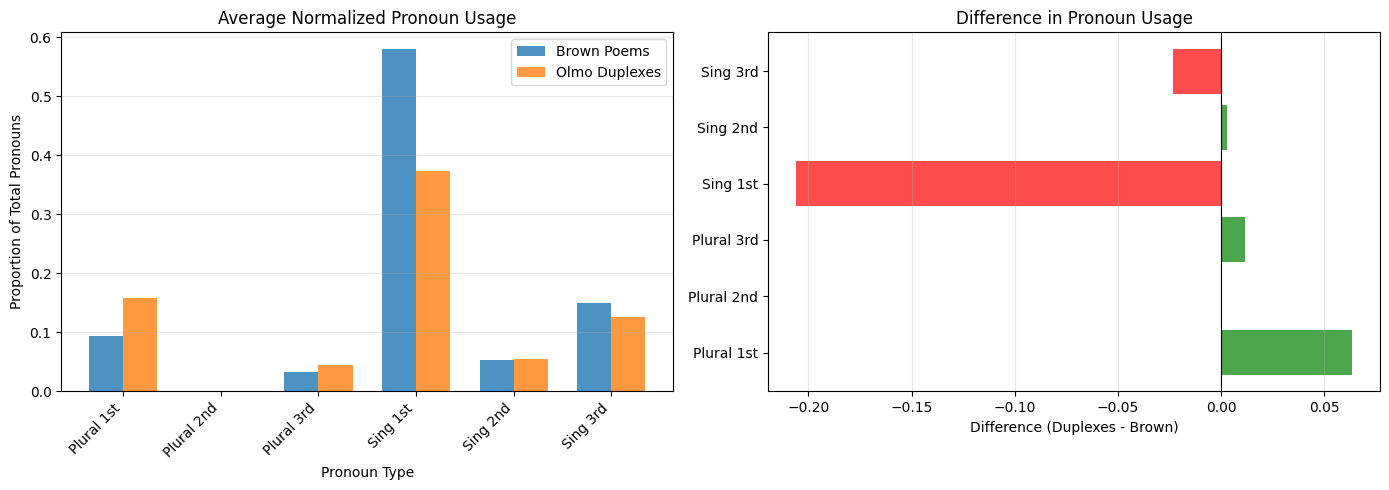

In [ ]:
# visualize the comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# bar chart comparison
labels = ['Plural 1st', 'Plural 2nd', 'Plural 3rd',
          'Sing 1st', 'Sing 2nd', 'Sing 3rd']
x = np.arange(len(labels))
width = 0.35

axes[0].bar(x - width/2, brown_means, width, label='Brown Poems', alpha=0.8)
axes[0].bar(x + width/2, Olmo_means, width, label='Olmo Duplexes', alpha=0.8)
axes[0].set_xlabel('Pronoun Type')
axes[0].set_ylabel('Proportion of Total Pronouns')
axes[0].set_title('Average Normalized Pronoun Usage')
axes[0].set_xticks(x)
axes[0].set_xticklabels(labels, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Difference plot
colors = ['green' if x > 0 else 'red' for x in comparison_df['Difference']]
axes[1].barh(labels, comparison_df['Difference'], color=colors, alpha=0.7)
axes[1].set_xlabel('Difference (Duplexes - Brown)')
axes[1].set_title('Difference in Pronoun Usage')
axes[1].axvline(x=0, color='black', linestyle='-', linewidth=0.8)
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

Distinctive Words

In [ ]:
# download Hessel's implementation of "fightin words"
!wget https://raw.githubusercontent.com/jmhessel/FightingWords/refs/heads/master/fighting_words_py3.py

--2025-12-10 18:23:32--  https://raw.githubusercontent.com/jmhessel/FightingWords/refs/heads/master/fighting_words_py3.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2967 (2.9K) [text/plain]
Saving to: ‘fighting_words_py3.py’

fighting_words_py3. 100%[===================>]   2.90K  --.-KB/s    in 0s      

2025-12-10 18:23:32 (36.2 MB/s) - ‘fighting_words_py3.py’ saved [2967/2967]



In [ ]:
# import it
import fighting_words_py3

In [ ]:
# run it
brown_poems = brown_poems_df["poem_text"].tolist()
duplexes = duplexes_df["poem_text"].tolist()

results = fighting_words_py3.bayes_compare_language(
    brown_poems,
    duplexes,
    prior = .05,
)

results

Vocab size is 373
Comparing language...


[('we', np.float64(-1.069644088501593)),
 ('still', np.float64(-0.8759648718457617)),
 ('yet', np.float64(-0.8736970398375727)),
 ('never', np.float64(-0.8185782402484957)),
 ('night', np.float64(-0.7791274311362791)),
 ('silence', np.float64(-0.7685490144520782)),
 ('echoes', np.float64(-0.7630695590658134)),
 ('through', np.float64(-0.7312707426624829)),
 ('heart', np.float64(-0.7019204240626437)),
 ('holds', np.float64(-0.7019204240626437)),
 ('silent', np.float64(-0.7019204240626437)),
 ('now', np.float64(-0.6994873192018844)),
 ('every', np.float64(-0.6945412852373388)),
 ('from', np.float64(-0.6816819073781175)),
 ('mirror', np.float64(-0.6790199951359133)),
 ('not', np.float64(-0.6763264003425776)),
 ('old', np.float64(-0.6736003552260242)),
 ('her', np.float64(-0.6708410637669944)),
 ('their', np.float64(-0.6652194080038228)),
 ('echo', np.float64(-0.6652194080038228)),
 ('glass', np.float64(-0.6652194080038228)),
 ('time', np.float64(-0.659454444391611)),
 ('while', np.float64

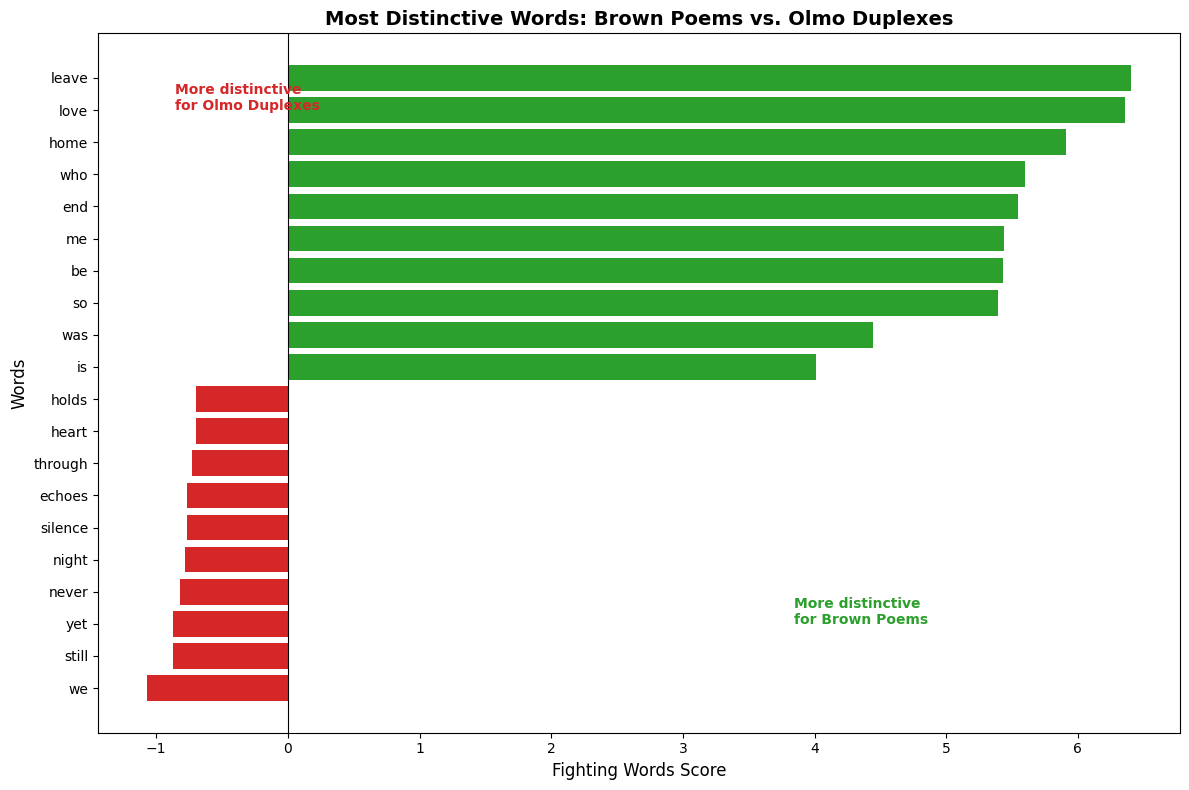

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the lowest 10 (most distinctive for Olmo duplexes)
lowest_10 = results[:10]

# Extract the highest 10 (most distinctive for brown_poems)
highest_10 = results[-10:]

# Combine them
words_to_plot = lowest_10 + highest_10
words = [item[0] for item in words_to_plot]
scores = [float(item[1]) for item in words_to_plot]

# Create the bar chart
plt.figure(figsize=(12, 8))
colors = ['#d62728' if score < 0 else '#2ca02c' for score in scores]
bars = plt.barh(words, scores, color=colors)

# Add a vertical line at x=0
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)

# Labels and title
plt.xlabel('Fighting Words Score', fontsize=12)
plt.ylabel('Words', fontsize=12)
plt.title('Most Distinctive Words: Brown Poems vs. Olmo Duplexes', fontsize=14, fontweight='bold')

# Add a legend
plt.text(min(scores)*0.8, len(words)-2, 'More distinctive\nfor Olmo Duplexes',
         color='#d62728', fontsize=10, fontweight='bold')
plt.text(max(scores)*0.6, 2, 'More distinctive\nfor Brown Poems',
         color='#2ca02c', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()